In [129]:
#Import the neccessary Libraries
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Deliverable 1 & 2 ::

In [2]:
#Read the data as a dataframe
ObjectRecognition = pd.read_csv('vehicle-2.csv')

In [3]:
#Shape of the data
ObjectRecognition.shape

(846, 19)

In [4]:
#Data Type of each attribute:Method 1
ObjectRecognition.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [5]:
#Checking the presence of null values
ObjectRecognition.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [6]:
ObjectRecognition_Dependent = ObjectRecognition['class']

In [7]:
ObjectRecognition = ObjectRecognition.drop(labels = "class", axis = 1)

In [8]:
for column in ObjectRecognition.columns:
    ObjectRecognition[column].fillna(value=ObjectRecognition[column].median(), inplace=True)

In [9]:
#Look of the data
ObjectRecognition.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
2             188.0            196  
3             199.0            207  
4             180.0            183

In [10]:
#5 Point Summary or descriptive statistics
ObjectRecognition.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

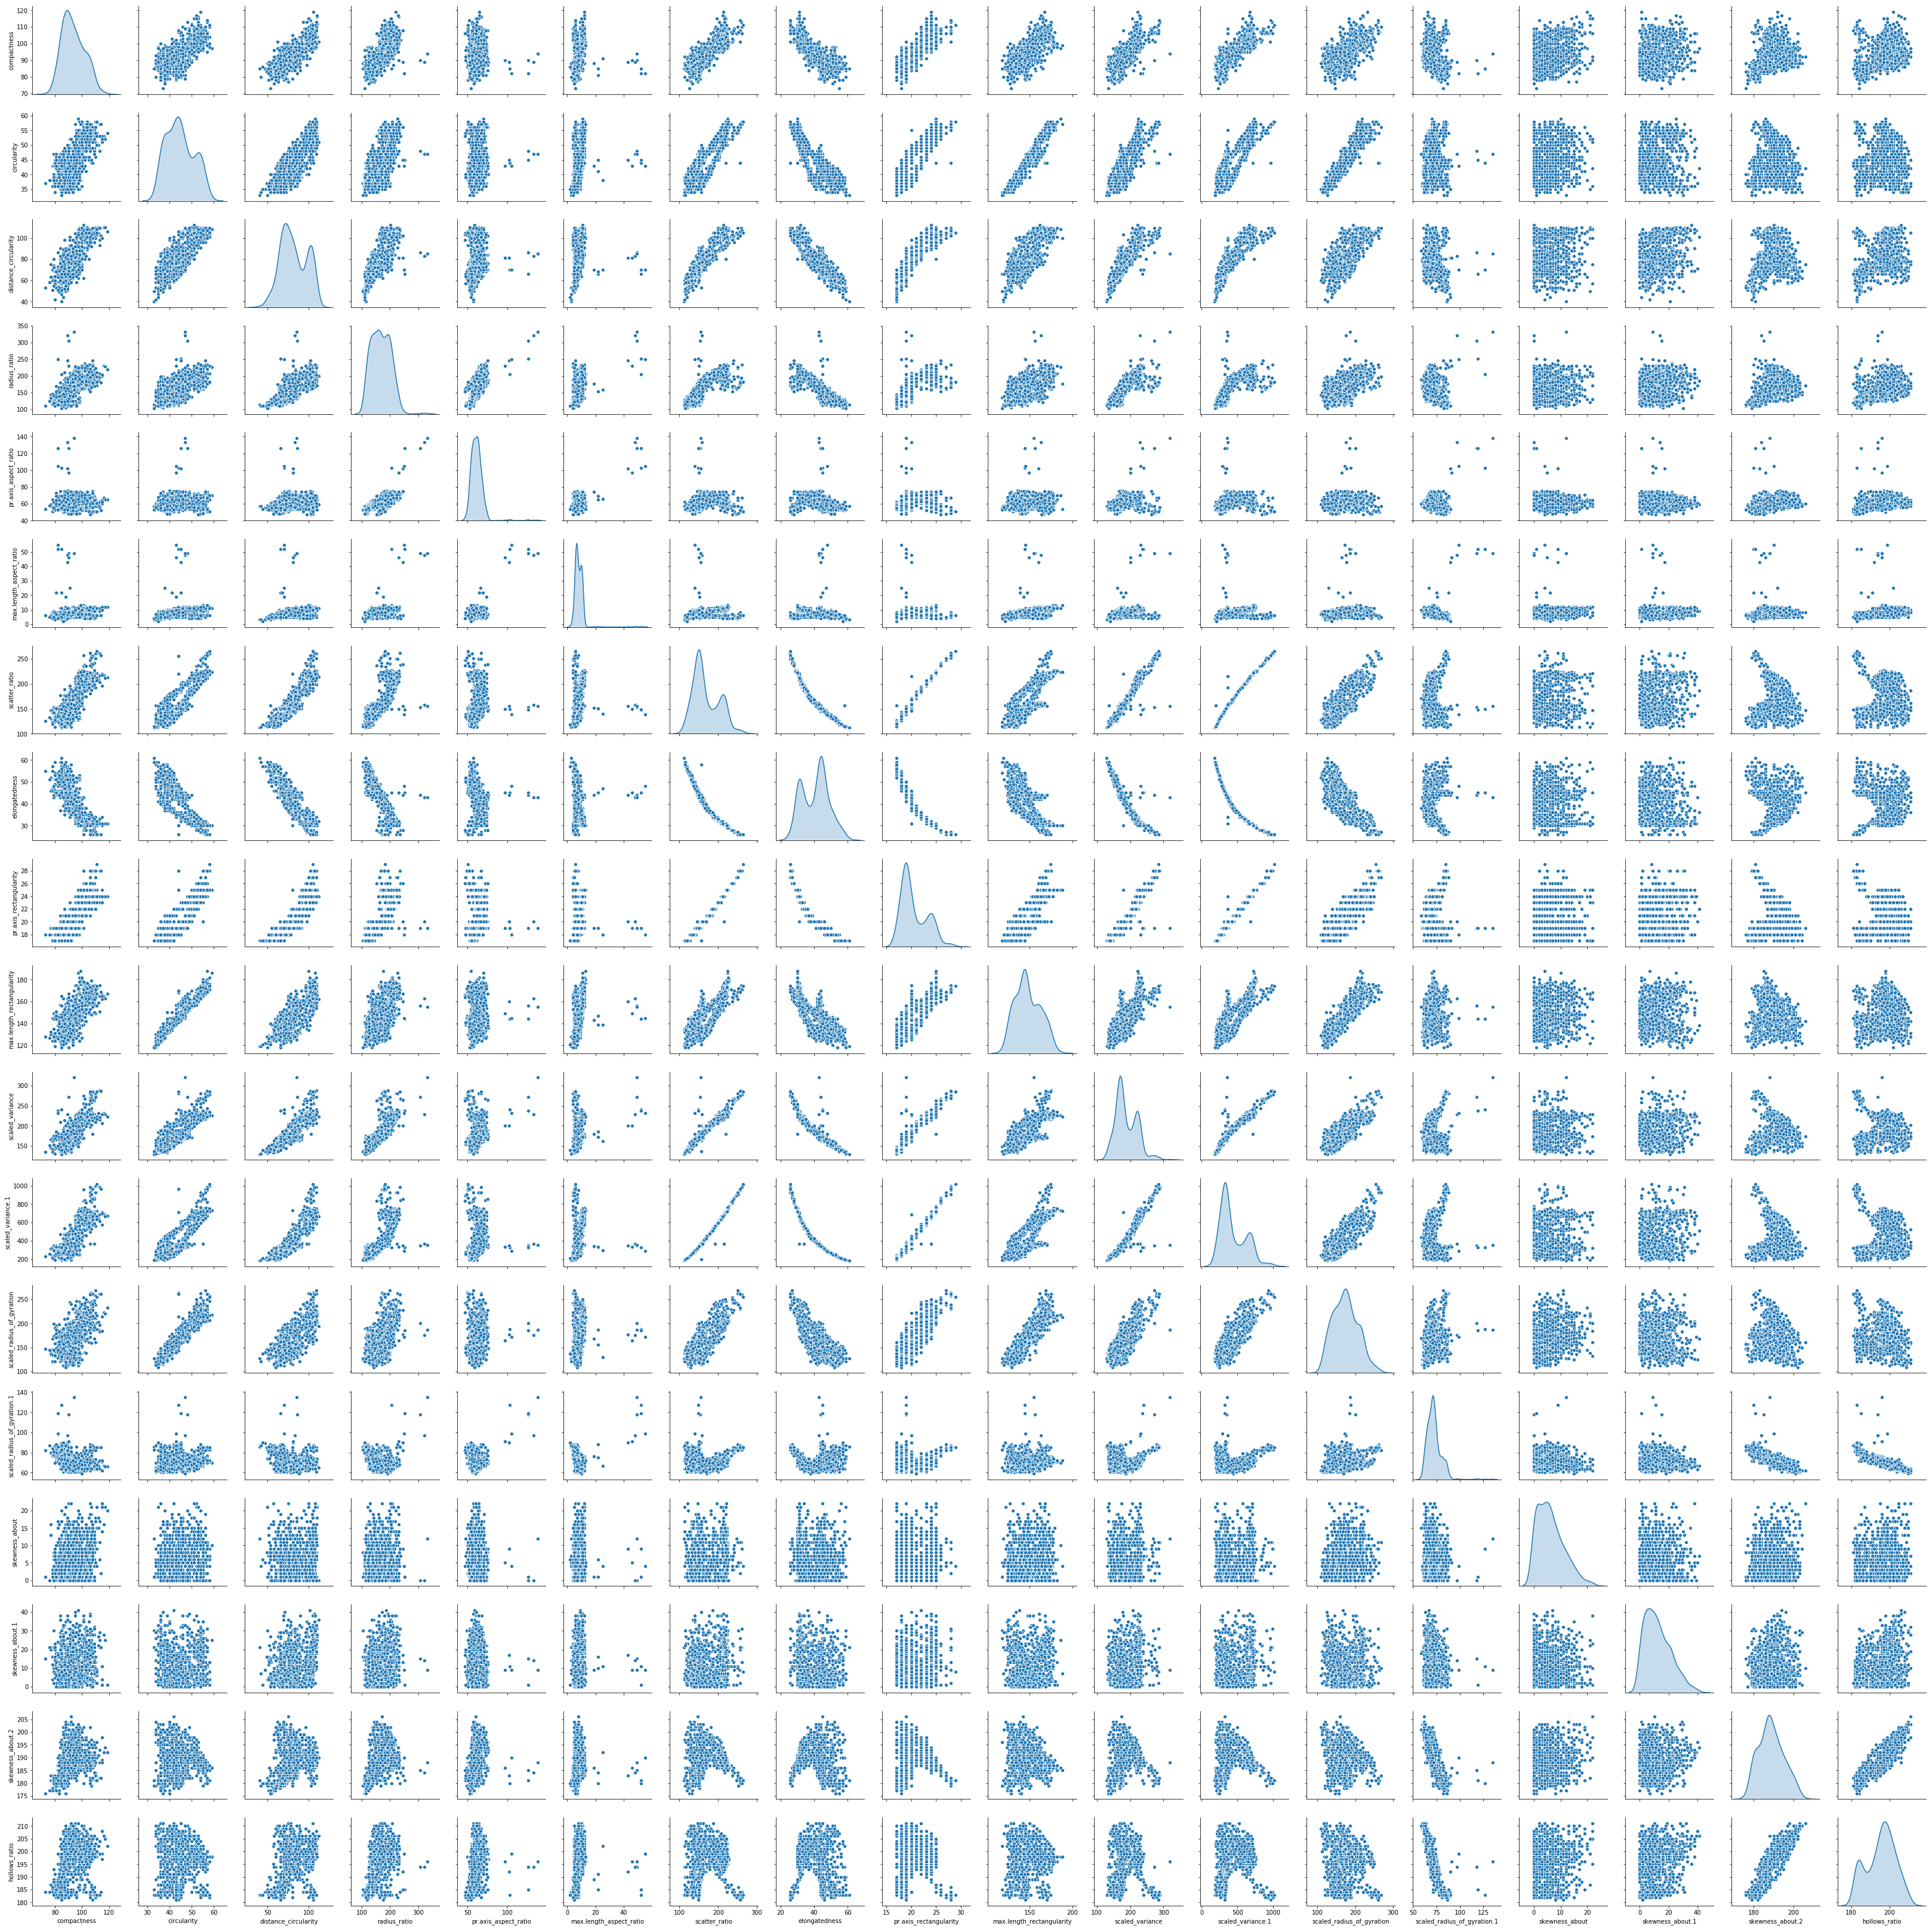

In [11]:
#Data Distribution across columns
sns.pairplot(ObjectRecognition, diag_kind='kde')

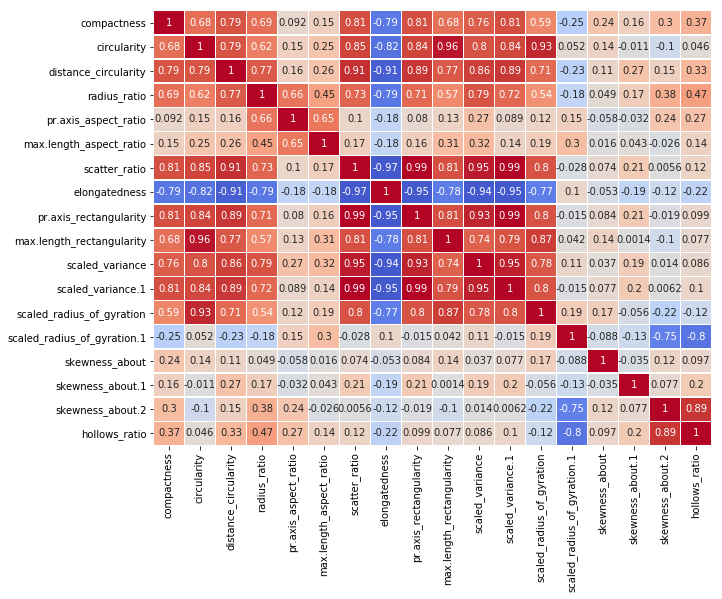

In [12]:
#To get the correlation between the columns
plt.figure(figsize=(10,8))
sns.heatmap(ObjectRecognition.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap='coolwarm',
            robust=True
            )
plt.show()

## Inference on Descriptive statistics

1. Mean and Median (50%) are almost similar for all the columns except 'scaled_variance' , 'scaled_variance.1' and 'scatter_ratio'. Hence, it implies there are lesser chances of outliers present in other columns and it will be evident in the box plot when drew for all the columns

2. There are outliers also observed in 'pr.axis_aspect_ratio', 'max.length_aspect_ratio' inaddition to the above 3 columns

2. Box Plot and Heat map will be applied on the data set to understand the relationship between the variables and the correlation coefficient

3. There is a linear relationship observed between 'compactness' and 'circularity' , 'compactness' and 'distance_circularity' 

4. There is a linear relationship observed between 'circularity' and 'distance_circularity' and 'scatter_ratio' to other columns such as 'compactness', 'circularity' and 'distance_circularity'

5. There is a decreasing linear relationship between 'elongatedness' to other columns such as 'compactness', 'circularity', 'distance_circularity' and 'raidus_ratio'

6. There is a linear relationship observed among 'max.length_rectangularity', 'scaled_variance' and 'scaled_variance.1' to 'compactness', 'circularity', 'distance_circularity' and 'raidus_ratio'

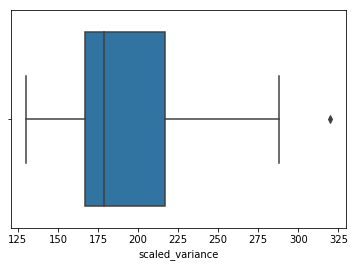

In [13]:
#To check the presence of outliers in 'scaled_variance.1'
sns.boxplot(ObjectRecognition['scaled_variance'])

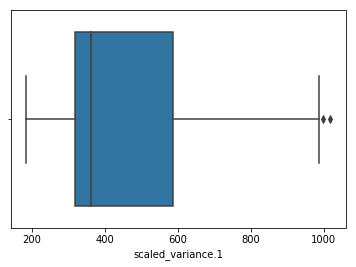

In [14]:
#To check the presence of outliers in 'scaled_variance'
sns.boxplot(ObjectRecognition['scaled_variance.1'])

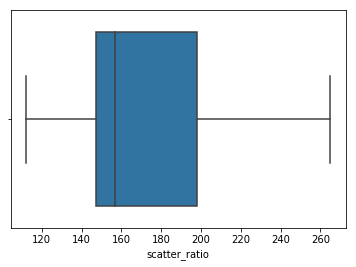

In [15]:
#To check the presence of outliers in 'scatter_ratio'
sns.boxplot(ObjectRecognition['scatter_ratio'])

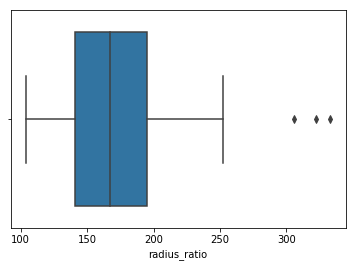

In [16]:
#To check the presence of outliers in 'radius_ratio'
sns.boxplot(ObjectRecognition['radius_ratio'])

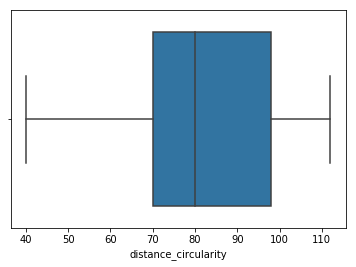

In [17]:
#To check the presence of outliers in 'radius_ratio'
sns.boxplot(ObjectRecognition['distance_circularity'])

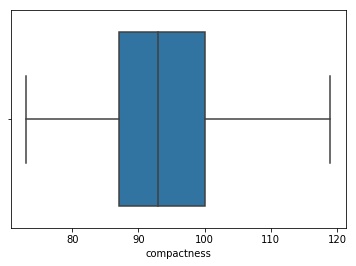

In [18]:
#To check the presence of outliers in 'compactness'
sns.boxplot(ObjectRecognition['compactness'])

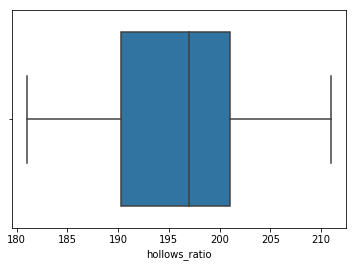

In [19]:
#To check the presence of outliers in 'hollows_ratio'
sns.boxplot(ObjectRecognition['hollows_ratio'])

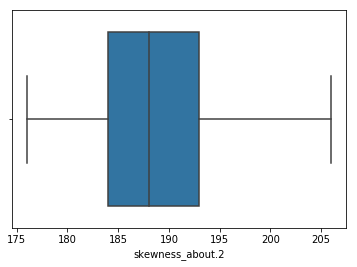

In [20]:
#To check the presence of outliers in 'skewness_about.2'
sns.boxplot(ObjectRecognition['skewness_about.2'])

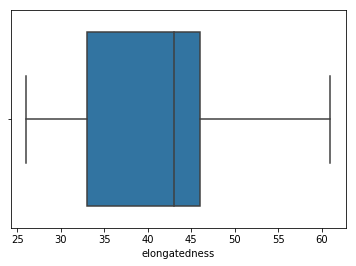

In [21]:
#To check the presence of outliers in 'elongatedness'
sns.boxplot(ObjectRecognition['elongatedness'])

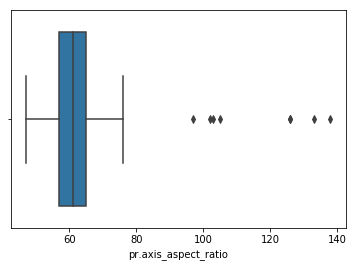

In [22]:
#To check the presence of outliers in 'pr.axis_aspect_ratio'
sns.boxplot(ObjectRecognition['pr.axis_aspect_ratio'])

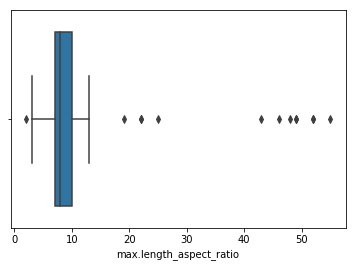

In [23]:
#To check the presence of outliers in 'max.length_aspect_ratio'
sns.boxplot(ObjectRecognition['max.length_aspect_ratio'])

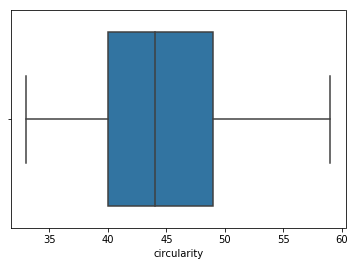

In [24]:
#To check the presence of outliers in 'circularity'
sns.boxplot(ObjectRecognition['circularity'])

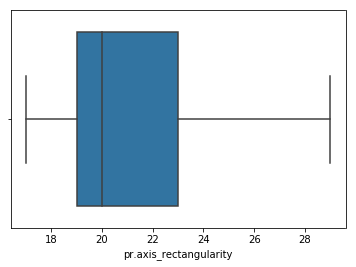

In [25]:
#To check the presence of outliers in 'pr.axis_rectangularity'
sns.boxplot(ObjectRecognition['pr.axis_rectangularity'])

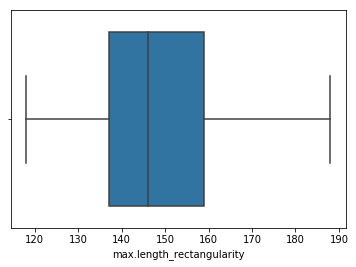

In [26]:
#To check the presence of outliers in 'max.length_rectangularity'
sns.boxplot(ObjectRecognition['max.length_rectangularity'])

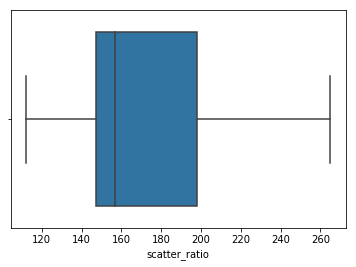

In [27]:
#To check the presence of outliers in 'scatter_ratio'
sns.boxplot(ObjectRecognition['scatter_ratio'])

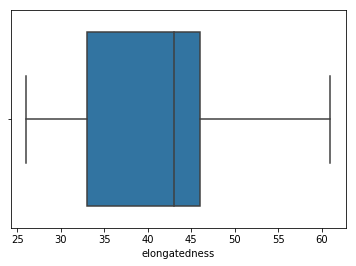

In [28]:
#To check the presence of outliers in 'elongatedness'
sns.boxplot(ObjectRecognition['elongatedness'])

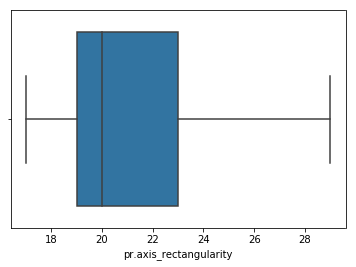

In [29]:
#To check the presence of outliers in 'pr.axis_rectangularity'
sns.boxplot(ObjectRecognition['pr.axis_rectangularity'])

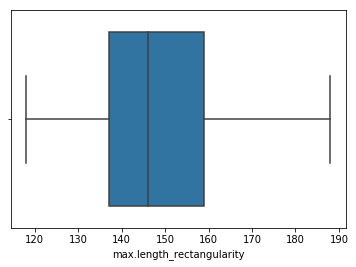

In [30]:
#To check the presence of outliers in 'max.length_rectangularity'
sns.boxplot(ObjectRecognition['max.length_rectangularity'])

In [31]:
#Retaining the data frame before removing outliers
ObjectRecognition_Original = ObjectRecognition

In [32]:
#Shape of the Created dataframe
ObjectRecognition_Original.shape

(846, 18)

In [33]:
#Removing the outliers present in 'max.length_aspect_ratio', 'pr.axis_aspect_ratio', 'radius_ratio'' columns 

ObjectRecognition = ObjectRecognition.drop(ObjectRecognition[ObjectRecognition['max.length_aspect_ratio']>15].index, axis = 0)
ObjectRecognition = ObjectRecognition.drop(ObjectRecognition[ObjectRecognition['pr.axis_aspect_ratio']>80].index, axis = 0)
ObjectRecognition = ObjectRecognition.drop(ObjectRecognition[ObjectRecognition['radius_ratio']>250].index, axis = 0)
ObjectRecognition = ObjectRecognition.drop(ObjectRecognition[ObjectRecognition['scatter_ratio']>200].index, axis = 0)
ObjectRecognition = ObjectRecognition.drop(ObjectRecognition[ObjectRecognition['elongatedness']<30].index, axis = 0)
ObjectRecognition = ObjectRecognition.drop(ObjectRecognition[ObjectRecognition['pr.axis_rectangularity']>23].index, axis = 0)
ObjectRecognition = ObjectRecognition.drop(ObjectRecognition[ObjectRecognition['max.length_rectangularity']>170].index, axis = 0)


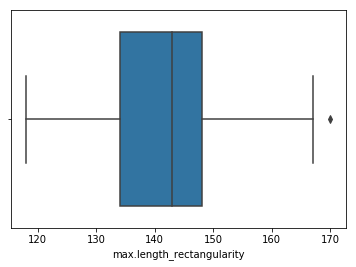

In [34]:
#Post Removing Outliers
sns.boxplot(ObjectRecognition['max.length_rectangularity'])

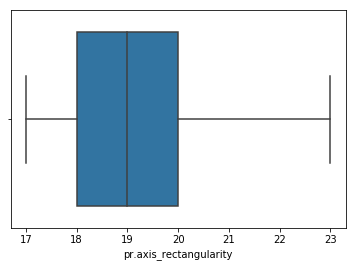

In [35]:
#Post Removing Outliers
sns.boxplot(ObjectRecognition['pr.axis_rectangularity'])

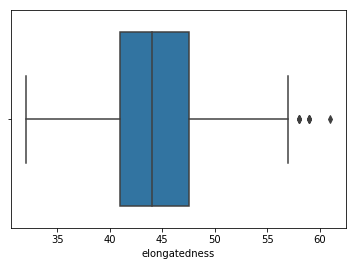

In [36]:
#Post Removing Outliers
sns.boxplot(ObjectRecognition['elongatedness'])

In [37]:
#To check the categorical variable 'class'
ObjectRecognition_Dependent.value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [39]:
#To check the shape of the data frame post removing outliers
ObjectRecognition.shape

(631, 18)

In [40]:
#Normalizing/Standardizing the dataframe
ObjectRecognition_z = ObjectRecognition.apply(zscore)

## Deliverable 3 & 4::

## Applying K-Means Clustering

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

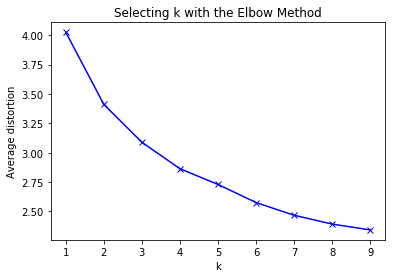

In [41]:
#Finding optimal no. of clusters
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(ObjectRecognition_z)
    prediction=model.predict(ObjectRecognition_z)
    meanDistortions.append(sum(np.min(cdist(ObjectRecognition_z, model.cluster_centers_, 'euclidean'), axis=1)) / ObjectRecognition_z
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

In [42]:
#Joining the class variable with the ObjectRecognition dataframe
ObjectRecognition['class'] = ObjectRecognition_Dependent

In [43]:
ObjectRecognition.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
3           93         41.0                  82.0         159.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
3                  63.0                        9          144.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
3           46.0                    19.0                        143   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
3            160.0              309.0                      127.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
3                         63.0             6.0              10.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
3             199.0            207   van  
6             200.0            204   bus  
7             193.0            202   van

In [44]:
ObjectRecognition.shape

(631, 19)

In [45]:
ObjectRecognition_Master = ObjectRecognition

In [46]:
# Let us first start with K = 3
final_model=KMeans(3)
final_model.fit(ObjectRecognition_z)
prediction=final_model.predict(ObjectRecognition_z)

#Append the prediction 
ObjectRecognition["GROUP"] = prediction
print("Groups Assigned : \n")
ObjectRecognition.head()

Groups Assigned : 



compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
3           93         41.0                  82.0         159.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
3                  63.0                        9          144.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
3           46.0                    19.0                        143   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
3            160.0              309.0                      127.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
3                         63.0             6.0              10.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   

   skewness_about.2  hollows_ratio class  GROUP  
0             187.0            197   van      2  
1             189.0            199   van      2  
3             199.0            207   van      2  
6             200.0            204   bus      2  
7             193.0            202   van      2

In [47]:
#Checking the distribution of GROUP variable
ObjectRecognition['GROUP'].value_counts()

2    315
0    204
1    112
Name: GROUP, dtype: int64

In [48]:
ObjectRecognition = ObjectRecognition.drop(labels = "GROUP", axis = 1)

In [49]:
# Let us experiment with K = 4 as 4 categories such as a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars
final_model=KMeans(4)
final_model.fit(ObjectRecognition_z)
prediction=final_model.predict(ObjectRecognition_z)

#Append the prediction 
ObjectRecognition["GROUP"] = prediction
print("Groups Assigned : \n")
ObjectRecognition.head()

Groups Assigned : 



compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
3           93         41.0                  82.0         159.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
3                  63.0                        9          144.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
3           46.0                    19.0                        143   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
3            160.0              309.0                      127.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
3                         63.0             6.0              10.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   

   skewness_about.2  hollows_ratio class  GROUP  
0             187.0            197   van      2  
1             189.0            199   van      3  
3             199.0            207   van      3  
6             200.0            204   bus      3  
7             193.0            202   van      3

In [50]:
#Checking the distribution of GROUP variable
ObjectRecognition['GROUP'].value_counts()

3    205
0    178
1    136
2    112
Name: GROUP, dtype: int64

## Inference
1. Based on the number of clusters to be kept as 3 or above, it is better to have 3 as the number of clusters since increasing the clusters didnt have an impact in the number of groups created

In [51]:
ObjectRecognition = ObjectRecognition.drop(labels = "GROUP", axis = 1)
final_model=KMeans(3)
final_model.fit(ObjectRecognition_z)
prediction=final_model.predict(ObjectRecognition_z)

#Append the prediction 
ObjectRecognition["GROUP"] = prediction
print("Groups Assigned : \n")
ObjectRecognition.head()

Groups Assigned : 



compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
3           93         41.0                  82.0         159.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
3                  63.0                        9          144.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
3           46.0                    19.0                        143   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
3            160.0              309.0                      127.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
3                         63.0             6.0              10.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   

   skewness_about.2  hollows_ratio class  GROUP  
0             187.0            197   van      2  
1             189.0            199   van      2  
3             199.0            207   van      2  
6             200.0            204   bus      2  
7             193.0            202   van      2

## Hierarchical Clustering - Agglomerative

In [52]:
ObjectRecognition_Master = ObjectRecognition_Master.drop(labels = "GROUP", axis = 1)

In [53]:
ObjectRecognition_Agglomerative = ObjectRecognition_Master
ObjectRecognition_Agglomerative.head()
print(ObjectRecognition_Agglomerative.shape)

(631, 19)


In [54]:
ObjectRecognition_Agglomerative = ObjectRecognition_Agglomerative.drop(labels = "class", axis = 1)

In [55]:
#Checking the presence of null values
ObjectRecognition_Agglomerative.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

In [56]:
#Normalizing/Standardizing the data set
ObjectRecognition_Agglomerative_z = ObjectRecognition_Agglomerative.apply(zscore)

In [57]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')

In [58]:
model.fit(ObjectRecognition_Agglomerative_z)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3, pooling_func='deprecated')

In [59]:
ObjectRecognition_Agglomerative['GROUP'] = model.labels_
ObjectRecognition_Agglomerative.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
3           93         41.0                  82.0         159.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
3                  63.0                        9          144.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
3           46.0                    19.0                        143   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
3            160.0              309.0                      127.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
3                         63.0             6.0              10.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   

   skewness_about.2  hollows_ratio  GROUP  
0             187.0            197      0  
1             189.0            199      0  
3             199.0            207      0  
6             200.0            204      0  
7             193.0            202      0

In [60]:
ObjectRecognition_Agglomerative['GROUP'].value_counts()

0    490
1     92
2     49
Name: GROUP, dtype: int64

In [61]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(ObjectRecognition_Agglomerative_z, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(ObjectRecognition_Agglomerative_z))

c

0.6441150795455699

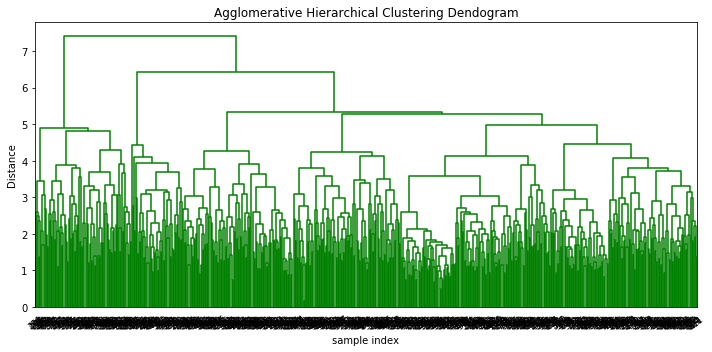

In [62]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=40.,color_threshold = 60, leaf_font_size=8. )
plt.tight_layout()

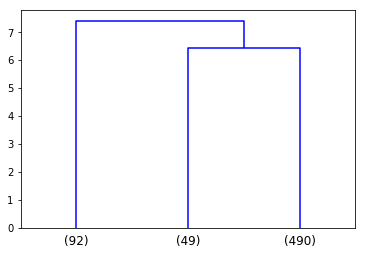

In [63]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

### Using Standard Scalar

In [64]:
ObjectRecognition_Standard = ObjectRecognition_Master
ObjectRecognition_Standard.head()
print(ObjectRecognition_Agglomerative.shape)

(631, 19)


In [65]:
ObjectRecognition_Standard = ObjectRecognition_Standard.drop(labels = "class", axis = 1)

In [66]:
sc = StandardScaler()
X_std = sc.fit_transform(ObjectRecognition_Standard) 

/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [67]:
Z = linkage(X_std, 'average', metric='euclidean')
Z.shape

(630, 4)

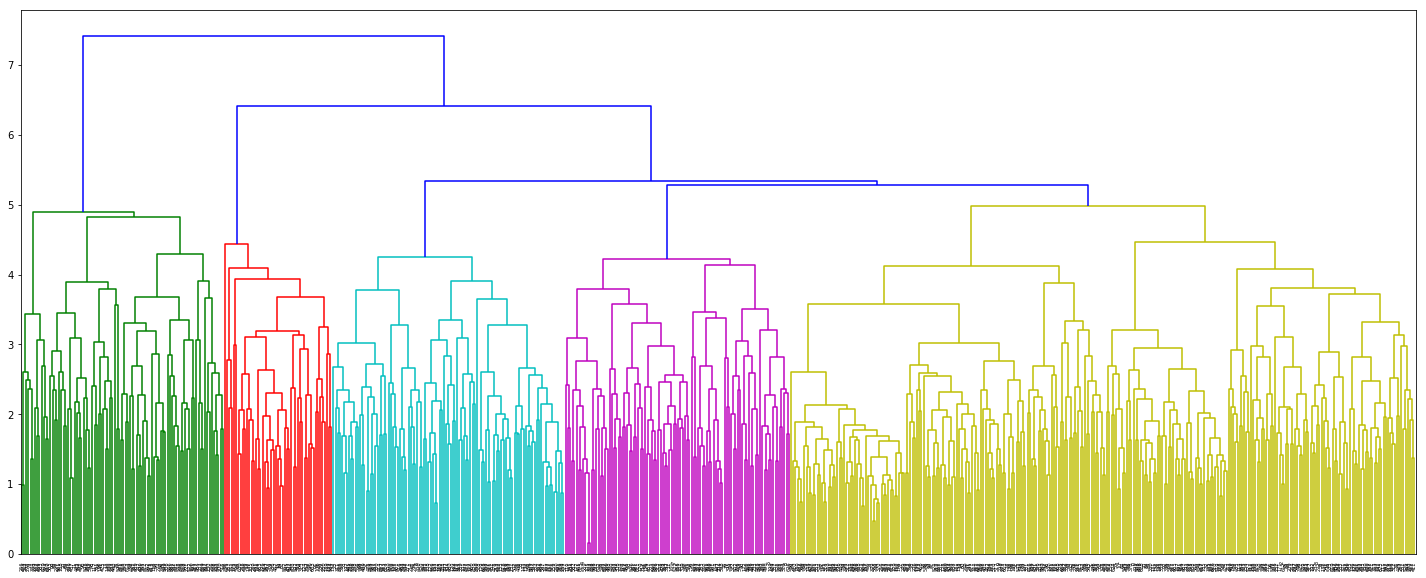

In [68]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

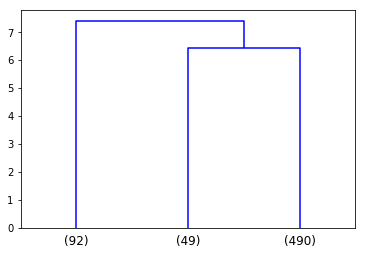

In [69]:
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

## Supervised Learning - Applying SVM without PCA

In [70]:
ObjectRecognition.shape

(631, 20)

In [71]:
ObjectRecognition.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
3           93         41.0                  82.0         159.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
3                  63.0                        9          144.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
3           46.0                    19.0                        143   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
3            160.0              309.0                      127.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
3                         63.0             6.0              10.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   

   skewness_about.2  hollows_ratio class  GROUP  
0             187.0            197   van      2  
1             189.0            199   van      2  
3             199.0            207   van      2  
6             200.0            204   bus      2  
7             193.0            202   van      2

In [72]:
ObjectRecognition_Group = ObjectRecognition['GROUP']

In [73]:
ObjectRecognition = ObjectRecognition.drop(labels = "GROUP", axis = 1)

In [74]:
ObjectRecognition = ObjectRecognition.drop(labels = "class", axis = 1)

In [75]:
#Normalizing the data set
ObjectRecognition_Independent_z = ObjectRecognition.apply(zscore)

In [76]:
#Creating Train and Test set from the given dataset
X = np.array(ObjectRecognition_Independent_z)
y = np.array(ObjectRecognition_Group)

test_size = 0.30 # taking 70:30 training and test set
seed =1 # Random number seeding for reapeatability of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [77]:
clf = svm.SVC()
clf.fit(X_train, y_train)
predicted_labels = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.9842105263157894
[[64  0  2]
 [ 0 35  0]
 [ 1  0 88]]


/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Including Hyper parameters and Tuning SVM

In [78]:
clf = svm.SVC(gamma=0.025, C=3)
clf.fit(X_train, y_train)
predicted_labels = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.9789473684210527
[[64  0  2]
 [ 0 35  0]
 [ 1  1 87]]


## Supervised Learning with PCA

### 1. PCA with Reduce function

In [79]:
X = np.array(ObjectRecognition_Independent_z)
y = np.array(ObjectRecognition_Group)

In [80]:
X.shape

(631, 18)

In [81]:
y.shape

(631,)

In [82]:
ObjectRecognition.shape
ObjectRecognition.head(5)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
3           93         41.0                  82.0         159.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
3                  63.0                        9          144.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
3           46.0                    19.0                        143   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
3            160.0              309.0                      127.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
3                         63.0             6.0              10.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   

   skewness_about.2  hollows_ratio  
0             187.0            197  
1             189.0            199  
3             199.0            207  
6             200.0            204  
7             193.0            202

In [83]:
ObjectRecognition_Group.shape

(631,)

In [84]:
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.0015873   0.37151184  0.60331414  0.68143561  0.32384362  0.38273286
   0.59888589 -0.58241612  0.60782095  0.38633551  0.58733892  0.62250013
   0.19415991 -0.51142407  0.17093315  0.02929716  0.58990093  0.56765633]
 [ 0.37151184  1.0015873   0.58898511  0.43761884  0.27502244  0.47102434
   0.64182288 -0.62403673  0.64373758  0.9354872   0.6006629   0.62473495
   0.91837281 -0.02215809  0.1315673  -0.29266685 -0.00199943  0.07091111]
 [ 0.60331414  0.58898511  1.0015873   0.75765484  0.35441353  0.65053834
   0.85185379 -0.83679603  0.84570624  0.56052791  0.83362584  0.84150347
   0.45203868 -0.46284068  0.02208863  0.17540366  0.34407842  0.46930317]
 [ 0.68143561  0.43761884  0.75765484  1.0015873   0.74897155  0.30905918
   0.81294274 -0.84236738  0.77923721  0.33997026  0.82451611  0.83761322
   0.32412077 -0.59354711 -0.00373785  0.11552404  0.64343503  0.64974197]
 [ 0.32384362  0.27502244  0.35441353  0.74897155  1.0015873   0.08092601
   0.4084635

In [85]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 2.38714949e-01 -1.54638094e-01  1.32478757e-01 -6.17200772e-02
   1.84870255e-01 -4.28453447e-01 -9.74617003e-02  7.45648902e-01
  -2.48691872e-01  1.45781915e-01  5.55997092e-02 -9.24933197e-03
  -6.50822079e-03 -1.65483311e-01 -8.52258019e-03 -2.22487616e-02
   1.13796595e-02  1.00347129e-02]
 [ 2.35131141e-01  3.05039386e-01  2.69963836e-01  5.38018094e-02
  -8.94912404e-02  1.42443524e-01 -2.91498055e-01  2.41542028e-02
  -4.98835441e-02 -1.30290048e-01 -1.01149104e-01 -1.18757808e-02
   2.44233350e-02  4.46006514e-02  1.19184520e-01 -4.31795712e-01
   4.71441246e-01 -4.54647927e-01]
 [ 2.99827838e-01 -3.98606899e-03 -4.72324515e-02 -2.39438124e-01
  -4.56267654e-02  2.20732536e-02  1.72274302e-01 -1.72196463e-01
  -5.70818166e-01 -5.07975271e-01  3.63847545e-01  2.37337389e-01
   2.18434072e-04  1.82950313e-02  7.90540835e-03  8.14307298e-02
   4.30969806e-02  8.45865268e-02]
 [ 2.97563050e-01 -1.69170515e-01 -8.33330764e-02  2.24126254e-01
   4.17601773e-02  

In [86]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(9.056227408180437, array([ 0.23871495,  0.23513114,  0.29982784,  0.29756305,  0.17753415,
        0.184319  ,  0.31224748, -0.31323697,  0.3073769 ,  0.21565118,
        0.30600645,  0.31278655,  0.19142423, -0.15499709,  0.01240894,
        0.01694491,  0.15419684,  0.17559552])), (3.2918709777345225, array([-0.15463809,  0.30503939, -0.00398607, -0.16917052, -0.14992658,
        0.04542023,  0.08625814, -0.05217603,  0.09664334,  0.28324604,
        0.06868694,  0.06346235,  0.36743303,  0.42045125, -0.00464482,
       -0.19717202, -0.44034104, -0.42047732])), (1.6331654856836448, array([ 0.13247876,  0.26996384, -0.04723245, -0.08333308, -0.01102649,
        0.22047383, -0.1974739 ,  0.17777676, -0.18138179,  0.33109131,
       -0.22862827, -0.19826146,  0.20663251, -0.22312887,  0.44429742,
       -0.42014597,  0.19059882,  0.21030752])), (1.199336486100888, array([-0.06172008,  0.05380181, -0.23943812,  0.22412625,  0.54377721,
       -0.53411363, -0.0123937 , -0.05942266, -0.0

In [87]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [0.5023264  0.68491829 0.77550592 0.84203013 0.89327483 0.92820062
 0.95086473 0.97180556 0.98008492 0.98593466 0.9901168  0.99333208
 0.99513947 0.99658888 0.99783459 0.99883997 0.99961631 1.        ]


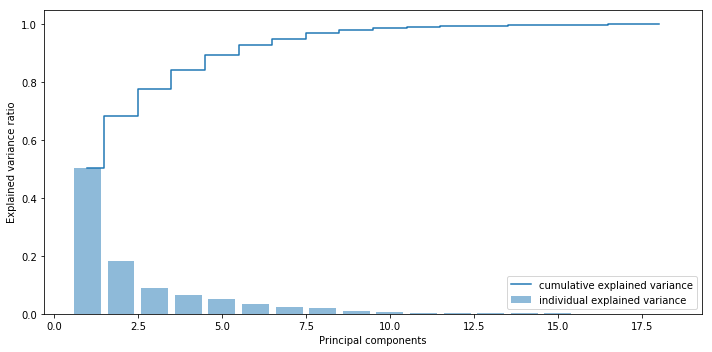

In [88]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1,19), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [89]:
# P_reduce represents reduced mathematical space....
P_reduce = np.array(eigvectors_sorted[0:7])   
X_std_7D = np.dot(X,P_reduce.T) 
Proj_data_df = pd.DataFrame(X_std_7D) 

In [92]:
X_std_7D.shape

(631, 7)

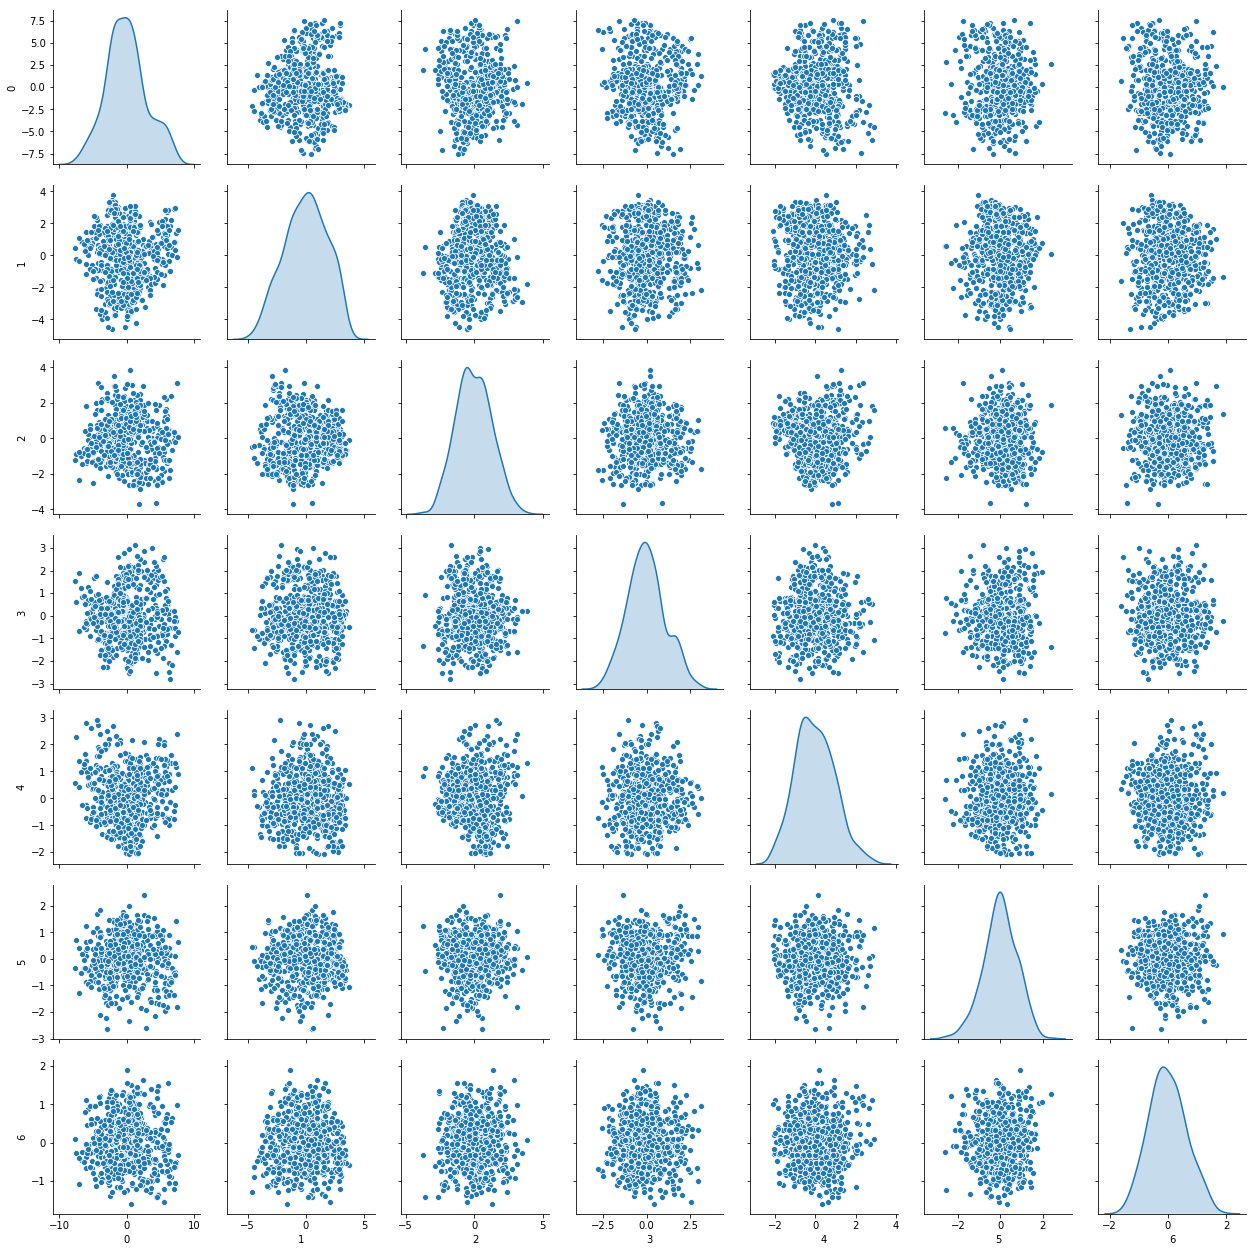

In [93]:
sns.pairplot(Proj_data_df, diag_kind='kde') 

In [94]:
test_size = 0.30 # taking 70:30 training and test set
seed = 1  # Random numbmer seeding for reapeatability of the code
X_train_pca, X_test_pca, y_train, y_test = model_selection.train_test_split(X_std_7D, y, test_size=test_size, random_state=seed)

In [95]:
clf = svm.SVC()
clf.fit(X_train_pca, y_train)
predicted_labels = clf.predict(X_test_pca)
model_score = clf.score(X_test_pca, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.968421052631579
[[63  0  3]
 [ 0 35  0]
 [ 2  1 86]]


/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 2. PCA with hstack function

In [96]:
ObjectRecognition_Master.shape

(631, 19)

In [107]:
ObjectRecognition_PCA = ObjectRecognition_Master

In [108]:
ObjectRecognition_PCA = ObjectRecognition_PCA.drop(labels = "class", axis = 1)

In [109]:
ObjectRecognition_PCA["GROUP"] = ObjectRecognition_Group

In [110]:
ObjectRecognition_PCA.shape

(631, 19)

In [111]:
ObjectRecognition_PCA.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
GROUP                          0
dtype: int64

In [112]:
# we separate the target variable (class) and save it in the y variable. Also the X contains the independant variables.
X = ObjectRecognition_PCA.iloc[:,0:18].values
y = ObjectRecognition_PCA.iloc[:,18].values

In [113]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 1)

In [114]:
# scaling the data using the standard scaler
from sklearn.preprocessing import StandardScaler
X_train_sd = StandardScaler().fit_transform(X_train)
X_test_sd = StandardScaler().fit_transform(X_test)

In [115]:
# generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_sd.T) # the relevanat covariance matrix
print('Covariance Matrix \n%s', cov_matrix)

#generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('Eigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
%s [[ 1.00227273  0.36072512  0.60750989  0.69133492  0.34462237  0.38606292
   0.59880254 -0.58428311  0.60627891  0.37766491  0.59037443  0.62893066
   0.1796727  -0.51337905  0.18958598  0.06904219  0.58954206  0.57602441]
 [ 0.36072512  1.00227273  0.58103463  0.43783838  0.30818695  0.47783476
   0.62986803 -0.62161222  0.63386623  0.93273874  0.5922593   0.61574101
   0.91871908 -0.02399553  0.12698738 -0.29647095  0.00716914  0.06823109]
 [ 0.60750989  0.58103463  1.00227273  0.75065077  0.36206552  0.6504523
   0.84431949 -0.83501737  0.84034949  0.5590708   0.82876336  0.83717972
   0.44686916 -0.46508643  0.01683755  0.19231454  0.34930379  0.47221172]
 [ 0.69133492  0.43783838  0.75065077  1.00227273  0.74777985  0.30496339
   0.80741495 -0.83494135  0.77328429  0.33469578  0.82451275  0.83760889
   0.32255218 -0.60231533  0.0185031   0.14088248  0.65037419  0.64725688]
 [ 0.34462237  0.30818695  0.36206552  0.74777985  1.00227273  0.10284952
   0.40702404

In [116]:
# the "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 50.14671612  68.45035534  77.69109557  84.12273687  89.40482526
  92.8011193   95.04695258  97.17688684  98.00880695  98.59097409
  99.01198639  99.32293979  99.51336658  99.66074599  99.79170836
  99.89425328  99.96939029 100.        ]


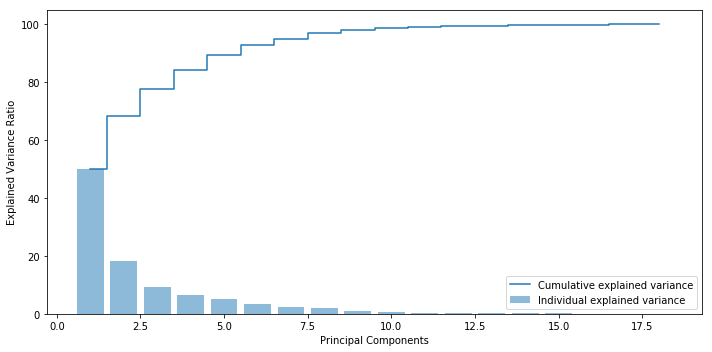

In [117]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [118]:
eigen_pairs = [(np.abs(e_vals[i]), e_vecs[:,i]) for i in range(len(e_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:7]

[(9.046923468049052,
  array([ 0.24006752,  0.23353562,  0.29933131,  0.29768396,  0.18099313,
          0.18571404,  0.31107849, -0.31318518,  0.30617509,  0.21391988,
          0.30605655,  0.31267831,  0.18949901, -0.15734052,  0.01481468,
          0.02534621,  0.15591809,  0.17529752])),
 (3.302142910763967,
  array([ 0.16015532, -0.3052631 ,  0.00391631,  0.16826263,  0.13909913,
         -0.05360009, -0.08741547,  0.05472236, -0.10115879, -0.28301247,
         -0.06597284, -0.06461676, -0.37104185, -0.41851598,  0.01632224,
          0.2023078 ,  0.43745114,  0.41920948])),
 (1.667113544026661,
  array([ 0.10958073,  0.27867451, -0.05642851, -0.06355829,  0.06025069,
          0.20980289, -0.20561231,  0.17182017, -0.19436784,  0.33208573,
         -0.2300362 , -0.20492136,  0.21069653, -0.21022878,  0.40673215,
         -0.45098519,  0.19774501,  0.21019659])),
 (1.1603265604251174,
  array([-0.07380504,  0.04182122, -0.24266815,  0.24489283,  0.54475118,
         -0.575493  , 

In [119]:
# generating dimensionally reduced datasets
w = np.hstack((eigen_pairs[0][1].reshape(18,1), 
                      eigen_pairs[1][1].reshape(18,1)))
print('Matrix W:\n', w)
X_sd_pca = X_train_sd.dot(w)
X_test_sd_pca = X_test_sd.dot(w)

Matrix W:
 [[ 0.24006752  0.16015532]
 [ 0.23353562 -0.3052631 ]
 [ 0.29933131  0.00391631]
 [ 0.29768396  0.16826263]
 [ 0.18099313  0.13909913]
 [ 0.18571404 -0.05360009]
 [ 0.31107849 -0.08741547]
 [-0.31318518  0.05472236]
 [ 0.30617509 -0.10115879]
 [ 0.21391988 -0.28301247]
 [ 0.30605655 -0.06597284]
 [ 0.31267831 -0.06461676]
 [ 0.18949901 -0.37104185]
 [-0.15734052 -0.41851598]
 [ 0.01481468  0.01632224]
 [ 0.02534621  0.2023078 ]
 [ 0.15591809  0.43745114]
 [ 0.17529752  0.41920948]]


In [120]:
X_train_sd.shape, w.shape, X_sd_pca.shape, X_test_sd_pca.shape

((441, 18), (18, 2), (441, 2), (190, 2))

In [143]:
from sklearn.svm import SVC

clf = SVC()
clf.fit(X_train_sd, y_train)
print ('Before PCA score', clf.score(X_test_sd, y_test))

clf.fit(X_sd_pca, y_train)
print ('After PCA score', clf.score(X_test_sd_pca, y_test))
predicted_labels = clf.predict(X_test_sd_pca)
print(metrics.confusion_matrix(y_test, predicted_labels))

Before PCA score 0.9842105263157894
After PCA score 0.9736842105263158
[[64  0  2]
 [ 0 34  1]
 [ 2  0 87]]


/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### 3. PCA with PCA () and n_components

In [132]:
ObjectRecognition_PCA.shape

(631, 19)

In [133]:
ObjectRecognition_PCA_Target = ObjectRecognition_PCA['GROUP']

In [134]:
ObjectRecognition_PCA = ObjectRecognition_PCA.drop(labels = "GROUP", axis = 1)

In [135]:
XScaled=ObjectRecognition_PCA.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.764096     1.319324              0.619382      0.753880   
1     0.100214    -0.275491              0.703107     -0.596188   
3     0.432155    -0.275491              0.535656      0.060602   
6     1.096037     0.180170             -0.217872      0.571439   
7    -0.065757     0.180170             -0.803949     -0.012375   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0              2.043779                 1.385384       0.441473   
1             -0.716154                 0.813278      -0.221545   
3              0.387819                 0.813278      -0.476551   
6              0.755810                -0.903038      -0.017539   
7              0.755810                 0.813278      -0.833561   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0      -0.369865                0.449870                   1.612120   
1       0.134933               -0.249312                   0.100608   
3       0.303199               -0.249312                   0.100608   
6      -0.369865               -0.249312                   0.100608   
7       0.639731               -0.948494                   0.384016   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0         0.080206           0.247130                   0.883083   
1        -0.222244          -0.268475                  -0.157263   
3        -0.726329          -0.489448                  -1.397676   
6         0.080206           0.057724                   0.402923   
7        -0.625512          -0.784079                   0.082817   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                    -0.276305       -0.019535          0.519817   
1                     0.024296        0.618035          0.284012   
3                    -1.328406       -0.019535         -0.187597   
6                    -0.877506        1.468127         -1.248719   
7                    -0.727205       -0.657104         -1.012914   

   skewness_about.2  hollows_ratio  
0         -0.343178       0.186658  
1         -0.050747       0.441595  
3          1.411408       1.461344  
6          1.557624       1.078938  
7          0.534115       0.824001

In [136]:
y = np.array(ObjectRecognition_PCA_Target)

In [137]:
pca3 = PCA(n_components=7)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[-0.23871495 -0.23513114 -0.29982784 -0.29756305 -0.17753415 -0.184319
  -0.31224748  0.31323697 -0.3073769  -0.21565118 -0.30600645 -0.31278655
  -0.19142423  0.15499709 -0.01240894 -0.01694491 -0.15419684 -0.17559552]
 [ 0.15463809 -0.30503939  0.00398607  0.16917052  0.14992658 -0.04542023
  -0.08625814  0.05217603 -0.09664334 -0.28324604 -0.06868694 -0.06346235
  -0.36743303 -0.42045125  0.00464482  0.19717202  0.44034104  0.42047732]
 [ 0.13247876  0.26996384 -0.04723245 -0.08333308 -0.01102649  0.22047383
  -0.1974739   0.17777676 -0.18138179  0.33109131 -0.22862827 -0.19826146
   0.20663251 -0.22312887  0.44429742 -0.42014597  0.19059882  0.21030752]
 [-0.06172008  0.05380181 -0.23943812  0.22412625  0.54377721 -0.53411363
  -0.0123937  -0.05942266 -0.05402963 -0.09653668  0.03663138  0.02553713
   0.12794856  0.09595397 -0.12024097 -0.47862871  0.12697987 -0.03999214]
 [ 0.18487025 -0.08949124 -0.04562677  0.04176018 -0.15581322 -0.37545252
   0.09957889 -0.05964339  0.1034370

In [138]:
Xpca3

array([[-2.56262019, -0.66799537,  0.87101113, ..., -0.99535054,
        -1.648065  ,  0.48035455],
       [ 0.25471943,  0.18099226,  0.59343371, ...,  0.13644712,
         0.03739075,  0.30058467],
       [-0.17087997,  2.58889584,  1.27127961, ..., -0.93938682,
         0.23411946,  0.40547671],
       ...,
       [-1.67088709, -0.91214259,  0.08233966, ..., -2.01882353,
        -1.44639251,  0.25854382],
       [ 2.51812985,  1.90504858, -1.30419212, ..., -0.84055111,
        -0.53122864, -0.48588791],
       [ 5.03515543,  0.99280118, -0.75826025, ..., -0.52068203,
         0.041222  , -0.80247507]])

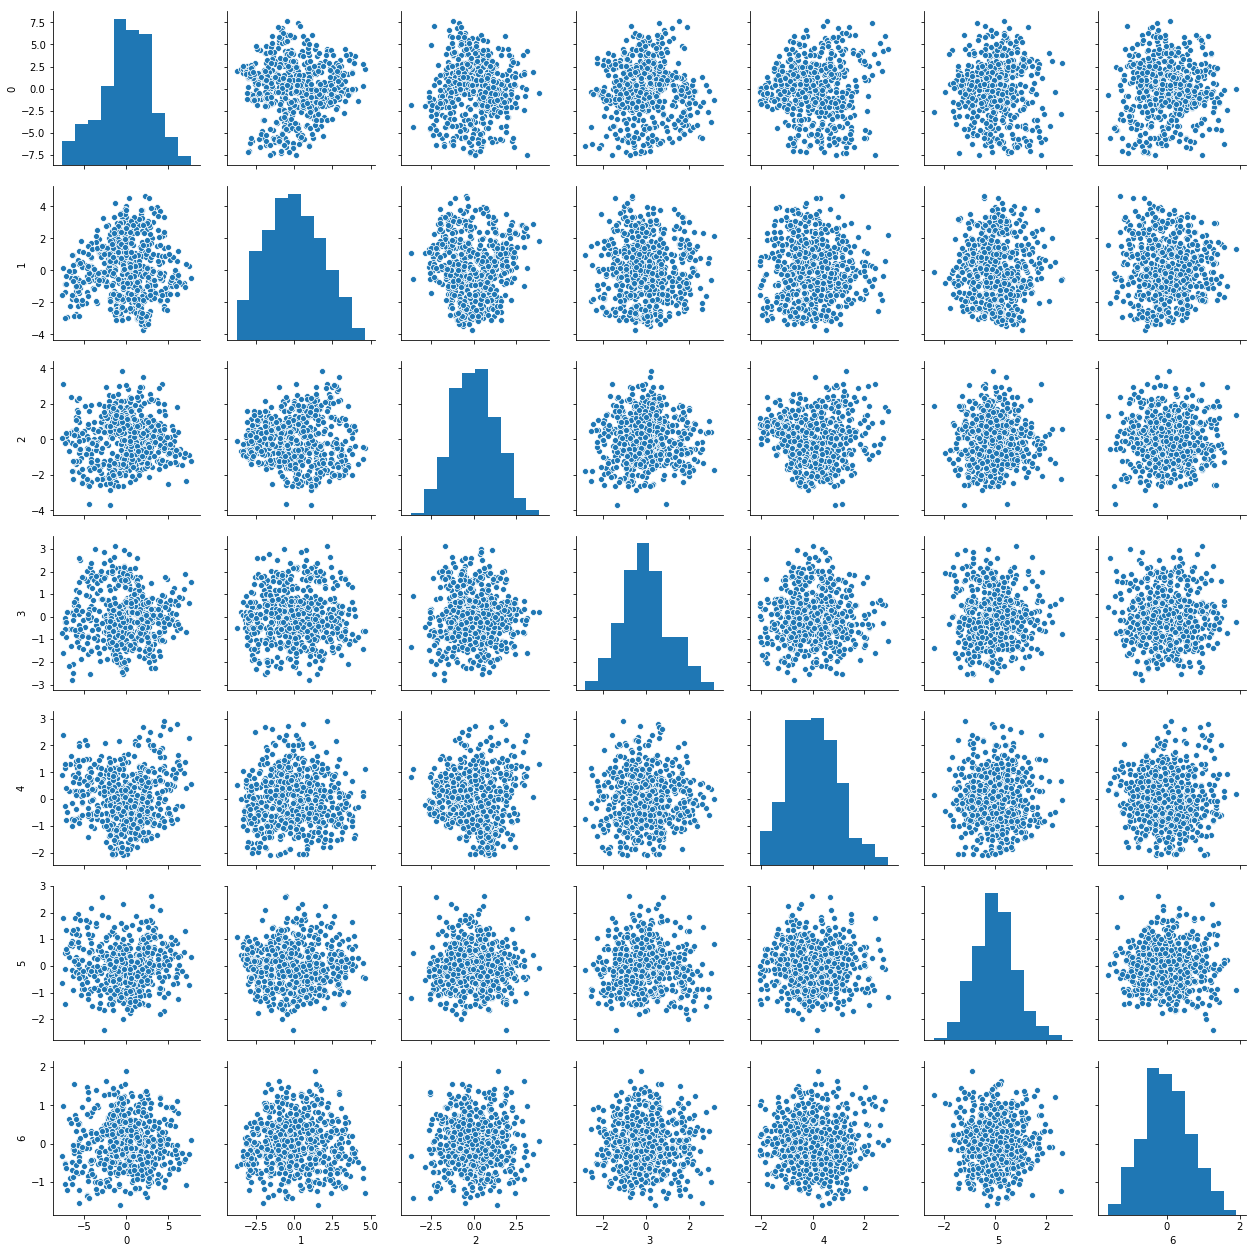

In [139]:
sns.pairplot(pd.DataFrame(Xpca3))

In [140]:
#splitting the data in test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca3,y, test_size = 0.30, random_state = 1)

In [141]:
clf = svm.SVC()
clf.fit(X_train, y_train)
predicted_labels = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, predicted_labels))

0.968421052631579
[[63  0  3]
 [ 0 35  0]
 [ 2  1 86]]


/Users/hshanmugavelu/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## Observations post applying PCA

1. Post Applying PCA, the model score has reduced from 98% to 96% and it has been evident from the above model scores retrieved for PCA with number of Principal components kept as 7 to achieve 95% of variance explained